# Práctica guiada

## Predicción de enfermedad cardíaca con Random Forest

<img src="img/heart-health-tips-animation-thumbnail.gif" alt="hearth">


El hospital de León quiere **predecir riesgo de enfermedad cardíaca** a partir de datos clínicos básicos de pacientes.


El objetivo **no es solo entrenar un modelo**, sino **decidir qué modelo es más adecuado**, cómo configurarlo y **explicar por qué**.

Trabajarás con:

* `heart.csv` → dataset completo
* `heart_disease_4features.csv` → versión reducida y más interpretable

El cuaderno base utiliza **Random Forest**, búsqueda de hiperparámetros y visualización de árboles .

---

## Resultados de aprendizaje trabajados

* **RA2.c** Define el modelo a implementar
* **RA2.d** Implementa la aplicación
* **RA2.e** Evalúa resultados

---

## Entrega

Un **notebook Jupyter** en formato PDF con:

* Código funcional
* Respuestas razonadas en Markdown
* Gráficas y métricas
* Conclusiones claras

---

## ¿Qué es Random Forest?

**Random Forest** es un algoritmo de **aprendizaje automático supervisado** que se utiliza tanto para **clasificación** como para **regresión**.

La idea principal es sencilla:

> En lugar de tomar una decisión con un solo árbol de decisión, Random Forest entrena **muchos árboles distintos** y combina sus resultados para obtener una predicción más fiable.

---

## ¿Cómo funciona?

1. Se crean **muchos subconjuntos distintos** del conjunto de entrenamiento (muestreo con reemplazo).
2. Con cada subconjunto se entrena **un árbol de decisión diferente**.
3. En cada árbol, las divisiones se hacen usando **solo una parte aleatoria de las variables**.
4. Para clasificar un nuevo dato:

   * Cada árbol da su predicción.
   * El modelo final decide por **votación mayoritaria**.

Este proceso reduce los errores debidos a:

* árboles demasiado complejos
* datos ruidosos
* sobreajuste al conjunto de entrenamiento

<img src="img/random-forest.png" alt="random forest">

---

## ¿Por qué no usar un solo árbol de decisión?

Un árbol de decisión:

* es fácil de entender
* pero **muy sensible a los datos**
* puede memorizar el entrenamiento (overfitting)

Random Forest soluciona esto porque:

* combina muchos árboles simples
* promedia sus decisiones
* generaliza mejor a datos nuevos

---

## Ventajas de Random Forest

* Funciona bien con **datos tabulares**
* No necesita normalización de variables
* Captura relaciones **no lineales**
* Es robusto frente al ruido
* Permite estimar la **importancia de las variables**

Por eso es muy utilizado en:

* medicina
* banca
* detección de fraude
* problemas reales con datos estructurados

---

## Inconvenientes

* Es menos interpretable que un solo árbol
* Consume más tiempo y recursos
* No es ideal cuando se necesita un modelo muy simple o explicable al 100%

Más información

[Machine Learning Google](https://developers.google.com/machine-learning/decision-forests?hl=es-419)

[Videotutorial: Random Forests con Python](https://www.youtube.com/watch?v=VfMPslt2wgA)

---

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score
)

import matplotlib.pyplot as plt
import seaborn as sns

## Parte 1 – Exploración y comprensión del dataset (obligatoria)

### 1.1 Carga de datos

Carga ambos datasets y responde:

In [ ]:

df_4vars = pd.read_csv("heart_disease_4features.csv")
df_ext = pd.read_csv("heart.csv")

print(df_4vars.head(5))
print("-----------------------------------------------")
print(df_ext.head(5))


   Unnamed: 0  age  sex  trestbps  chol  target
0           0   52    1       125   212       0
1           1   53    1       140   203       0
2           2   70    1       145   174       0
3           3   61    1       148   203       0
4           4   62    0       138   294       0
-----------------------------------------------
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
print(f"Variables df 4 vars: {len(df_4vars.columns)}")
print(f"Variables df completo: {len(df_ext.columns)}")

Variables df 4 vars: 6
Variables df completo: 14


<div style="background-color:green;color:white">

<br>

**Cuestiones (responde en Markdown):**

* ¿Cuántas variables tiene cada dataset?

  - Df 4 vars: 4 variables + objetivo (clase)
  - Df completo: 13 variables + objetivo (clase)

* ¿Cuál crees que será más fácil de explicar a un médico?

A un médico le será mucho más útil el completo porque es un experto en el campo y no tendrá problemas para comprender qué es cada una de las variables.

* ¿Qué se pierde al reducir variables?

Esencialmente se pierde información que puede ser relevante. En el caso del random forest se pierden "preguntas" que el algoritmo debe hacerse para poder llegar a una conclusión correcta.

<br>

---

### 1.2 Variable objetivo

<div style="background-color:green;color:white">

<br>

* Identifica claramente la variable *objetivo*

* Explica qué significa *0* y *1*


* Comprueba si hay **desbalanceo de clases**


 <br>

In [ ]:
y_4vars = df_4vars["target"]
y_ext = df_ext["target"]

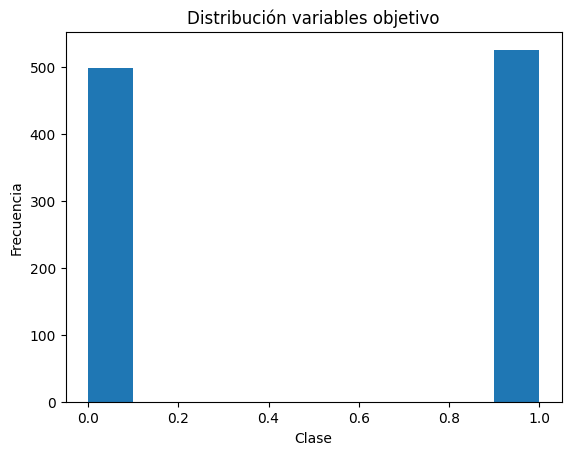

In [ ]:
plt.hist(y_4vars)
plt.title("Distribución variables objetivo")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

Las clases están bastante balanceadas (prácticamente el mismo número de registros).

La clase 0 indica que el registro no tiene riesgo cardíaco. Por el contrario, la clase 1 indica que el registro sí tiene riesgo cardíaco.

## Parte 2 – Primer modelo Random Forest (baseline)

### 2.1 Separación train/test

Usa `train_test_split` con:

* `test_size=0.2`
* `random_state=42`



In [ ]:
x = df_4vars.drop("target", axis=1)
y = df_4vars["target"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<div style="background-color:green;color:white">

<br>

Explica **por qué fijar la semilla es importante**.


<br>

Las semilla es lo que aleatoriza la división en datos de entrenamiento y de test para que no sean los mismos o que se sigan unos detrás de otro.

---

### 2.2 Entrenamiento inicial

Entrena un **Random Forest controlado**, es decir, **no utilices el modelo con los valores por defecto**.

Para ello:

* Crea un `RandomForestClassifier` fijando **explícitamente varios hiperparámetros**.
* Debes **limitar la complejidad del modelo** para evitar sobreajuste.
* Asegura que el entrenamiento sea **reproducible**.
* Evita que el modelo tome decisiones basadas en **muy pocos ejemplos**.
* (Opcional) Activa una estimación interna del rendimiento.

El modelo debe entrenarse con los datos de entrenamiento (`X_train`, `y_train`).

📌 **Ayuda**
Consulta la documentación oficial de [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) en *scikit-learn* para identificar qué hiperparámetros permiten:

* controlar la profundidad de los árboles,
* fijar el número de árboles,
* imponer un tamaño mínimo en las hojas,
* y garantizar reproducibilidad.




In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    min_samples_split=15,
    min_samples_leaf=10,
    oob_score=True,
    n_jobs=1,
)

rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=15,
                       n_jobs=1, oob_score=True)

---
## Parte 3 – Evaluación correcta del modelo

Una vez entrenado el modelo, es necesario **evaluar su rendimiento** para comprobar si es capaz de **generalizar correctamente** a datos que no ha visto durante el entrenamiento.

En esta parte no basta con obtener una predicción: se deben analizar **distintas métricas**, ya que cada una aporta información diferente sobre el comportamiento del modelo.

---

### Qué se va a hacer

Se evaluará el modelo utilizando el conjunto de test y se mostrarán:

* **Accuracy**
* **Matriz de confusión**
* **Informe de clasificación (classification report)**

Estas métricas permiten analizar no solo cuántas predicciones acierta el modelo, sino **qué tipo de errores comete**.

---

### Por qué no es suficiente una sola métrica

En problemas de clasificación, especialmente en contextos reales como la medicina, **no todos los errores tienen el mismo impacto**.
Por ejemplo, clasificar como sano a un paciente enfermo puede ser mucho más grave que el error contrario.

Por ello, es imprescindible analizar varias métricas y no quedarse solo con la accuracy.

---

- Accuracy: Indica el **porcentaje total de predicciones correctas**.


- Matriz de confusión: Muestra el **número de aciertos y errores por clase**, permite ver **qué tipo de errores son más frecuentes**.

- Classification report: Resume varias métricas clave para cada clase:

* **Precision**: de las predicciones positivas, cuántas son correctas.
* **Recall (sensibilidad)**: de los casos reales, cuántos detecta el modelo.
* **F1-score**: equilibrio entre precision y recall.

---




Precisión: 0.7121951219512195


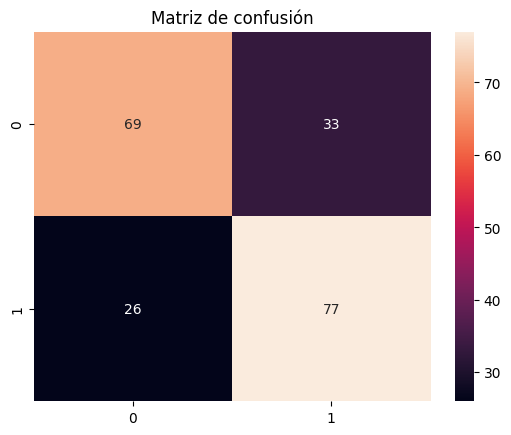

Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.73      0.68      0.70       102
           1       0.70      0.75      0.72       103

    accuracy                           0.71       205
   macro avg       0.71      0.71      0.71       205
weighted avg       0.71      0.71      0.71       205

Roc Score: 
 0.7120217018846374


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

y_preds = rf.predict(x_test)

print(f"Precisión: {accuracy_score(y_test, y_preds)}")

sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.title("Matriz de confusión")
plt.show()

print(f"Reporte de clasificación: \n {classification_report(y_test, y_preds)}")
print(f"Roc Score: \n {roc_auc_score(y_test, y_preds)}")


<div style="background-color:green;color:white">

<br>


- ¿El rendimiento del modelo es adecuado?

No es adecuado. La métrica importante en este caso es el `recall` porque hablamos de un problema médico, de vida o muerte. El recall es `0.66`, por lo que es muy mejorable.

- ¿Qué clase se predice mejor y cuál peor?

Se predicen mejor los de la clase 1 (Riesgo Cardíaco). Tan solo falla en 25 casos. El problema es que un fallo que puede ser muy costoso, al categorizar como "Sin Riesgo" a alguien que sí lo tiene.

La clase 0 se predice peor. Falla más que la anterior.

- ¿Qué tipo de error consideras más problemático en este contexto y por qué?

Como he dicho antes, catalogar como "Sin Riesgo" a alguien que sí que lo tiene puede significar que no sé le trate o se ajusten sus hábitos de vida y puede provocar (o no evitar) fácilmente un infarto.

- ¿Es suficiente la accuracy en un problema médico?

No. La métrica importante es el `recall`.

- Justifica con un ejemplo concreto.

Como he dicho antes, catalogar como "Sin Riesgo" a alguien que sí que lo tiene puede significar que no sé le trate o se ajusten sus hábitos de vida y puede provocar (o no evitar) fácilmente un infarto.

<br>

---

## Parte 4 – Optimización con GridSearchCV

En esta parte se va a **optimizar el modelo Random Forest entrenado anteriormente** utilizando **validación cruzada**.

En lugar de fijar los hiperparámetros manualmente, se utilizará `GridSearchCV` para **probar distintas combinaciones** de valores y seleccionar automáticamente la que **mejor rendimiento medio** obtenga en validación cruzada.

Se repetirá la **misma estrategia utilizada en el cuaderno base**:

* Se variará la **profundidad máxima de los árboles**.
* Se limitará el **número mínimo de muestras por hoja** para evitar decisiones basadas en pocos datos.
* Se probarán distintos **números de árboles** en el bosque.
* El rendimiento se evaluará mediante **accuracy** y validación cruzada.

El objetivo **no es solo mejorar la métrica**, sino **comparar el modelo optimizado con el modelo controlado anterior** y reflexionar sobre el coste computacional.

---


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "max_depth": [2, 3, 5, 10, 20],
    "min_samples_leaf": [5, 10, 20, 50, 100],
    "n_estimators": [10, 30, 50, 100]
}

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)


A partir del modelo y del conjunto de hiperparámetros definidos anteriormente, configura un proceso de **búsqueda exhaustiva** de hiperparámetros utilizando `GridSearchCV`.

El proceso debe cumplir las siguientes condiciones:

* Utiliza como **estimador** el modelo `RandomForestClassifier` previamente definido.
* Emplea el conjunto de hiperparámetros almacenado en `param_grid`.
* Aplica **validación cruzada** con un número fijo de particiones.
* Evalúa el rendimiento usando una **métrica de clasificación adecuada**.
* Aprovecha todos los núcleos disponibles del sistema.
* Muestra información detallada del proceso de búsqueda.

Al finalizar:

* Identifica los **mejores hiperparámetros** encontrados.
* Recupera el **mejor modelo** entrenado.
* Evalúa dicho modelo sobre el conjunto de test.

📌 **Ayuda**
Consulta la documentación oficial de [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) que permiten


* indicar el estimador,
* definir la rejilla de parámetros,
* establecer el número de particiones de la validación cruzada,
* seleccionar la métrica de evaluación,
* activar el uso de múltiples núcleos,
* y mostrar el progreso del entrenamiento.




In [ ]:
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="recall",
    n_jobs=1,
    verbose=3
)

grid.fit(x_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END max_depth=2, min_samples_leaf=5, n_estimators=10;, score=0.714 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=5, n_estimators=10;, score=0.702 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=5, n_estimators=10;, score=0.776 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=5, n_estimators=10;, score=0.671 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=5, n_estimators=10;, score=0.565 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=5, n_estimators=30;, score=0.643 total time=   0.1s
[CV 2/5] END max_depth=2, min_samples_leaf=5, n_estimators=30;, score=0.714 total time=   0.1s
[CV 3/5] END max_depth=2, min_samples_leaf=5, n_estimators=30;, score=0.659 total time=   0.1s
[CV 4/5] END max_depth=2, min_samples_leaf=5, n_estimators=30;, score=0.635 total time=   0.1s
[CV 5/5] END max_depth=2, min_samples_leaf=5, n_estimators=30;, score=0.706 total 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100]},
             scoring='recall', verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 100}
0.7872549019607844


In [ ]:
y_preds = grid.predict(x_test)
print(f"Reporte de clasificación: \n {classification_report(y_test, y_preds)}")

Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       102
           1       0.77      0.81      0.79       103

    accuracy                           0.78       205
   macro avg       0.78      0.78      0.78       205
weighted avg       0.78      0.78      0.78       205



<div style="background-color:green;color:white">

<br>

- ¿Qué combinación obtiene mejor resultado?

  - `max_depth`= 20
  - `min_samples_leaf`= 5
  - `n_estimator`= 100,

- ¿Ha mejorado realmente frente al modelo inicial?

Ha mejorado en todos los aspectos. El `recall`, la métrica interesante, ha subido a `0.81`. La `precision` no parece tan alta, pero no es tan importante en este caso.

- ¿Cuánto tiempo tarda y por qué?

Tarda bastante más (57 segundos). Se deben probar diferentes configuraciones, hacer predicciones, sacar la puntuaciones y compararla con el resto de modelos, por lo que es normal que tarde tanto.

Además, cada configuración a probar crea 3 posibilidades nuevas (porque hay 3 parámetros a probar) y cada una debe probarse. Es decir, cada nuevo parámetro debe probarse con otros 2, por lo que hay que hacer 3 modelos diferentes por cada número diferente.

A mayores, RandomForest funciona con muchos árboles de decisión, por lo que tiene que probar cada parámetro por cada uno de los árboles que crea (en este caso está configurado a `100`).

<br>

---

## Parte 5 – Interpretabilidad: dentro del bosque

### 5.1 Visualización de un árbol

En esta parte se va a **analizar el interior del modelo Random Forest** para comprender **cómo toma decisiones**.

Un Random Forest está formado por **muchos árboles de decisión**. El modelo final no se basa en uno solo, sino en la **combinación de todos ellos**.
Sin embargo, para entender el funcionamiento interno del modelo, es útil **visualizar uno de esos árboles individuales**.

El objetivo **no es explicar el modelo completo**, sino:

* observar **qué variables utiliza**,
* entender **qué tipo de reglas aprende**,
* y reflexionar sobre **las limitaciones de la interpretabilidad** en modelos de conjunto.


---

### Pistas para la implementación

* Un `RandomForestClassifier` almacena los árboles entrenados en un **atributo interno**.
* Cada árbol puede visualizarse usando una función específica de `sklearn.tree`.
* Es recomendable:

  * fijar el tamaño de la figura,
  * limitar la profundidad del árbol representado,
  * mostrar los nombres de las variables,
  * y colorear los nodos para facilitar la interpretación.

📌 **Ayuda**
Consulta la documentación de:

* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) para localizar dónde se almacenan los árboles entrenados.
* [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) para identificar los parámetros que controlan la visualización, los nombres de las variables y la profundidad máxima.



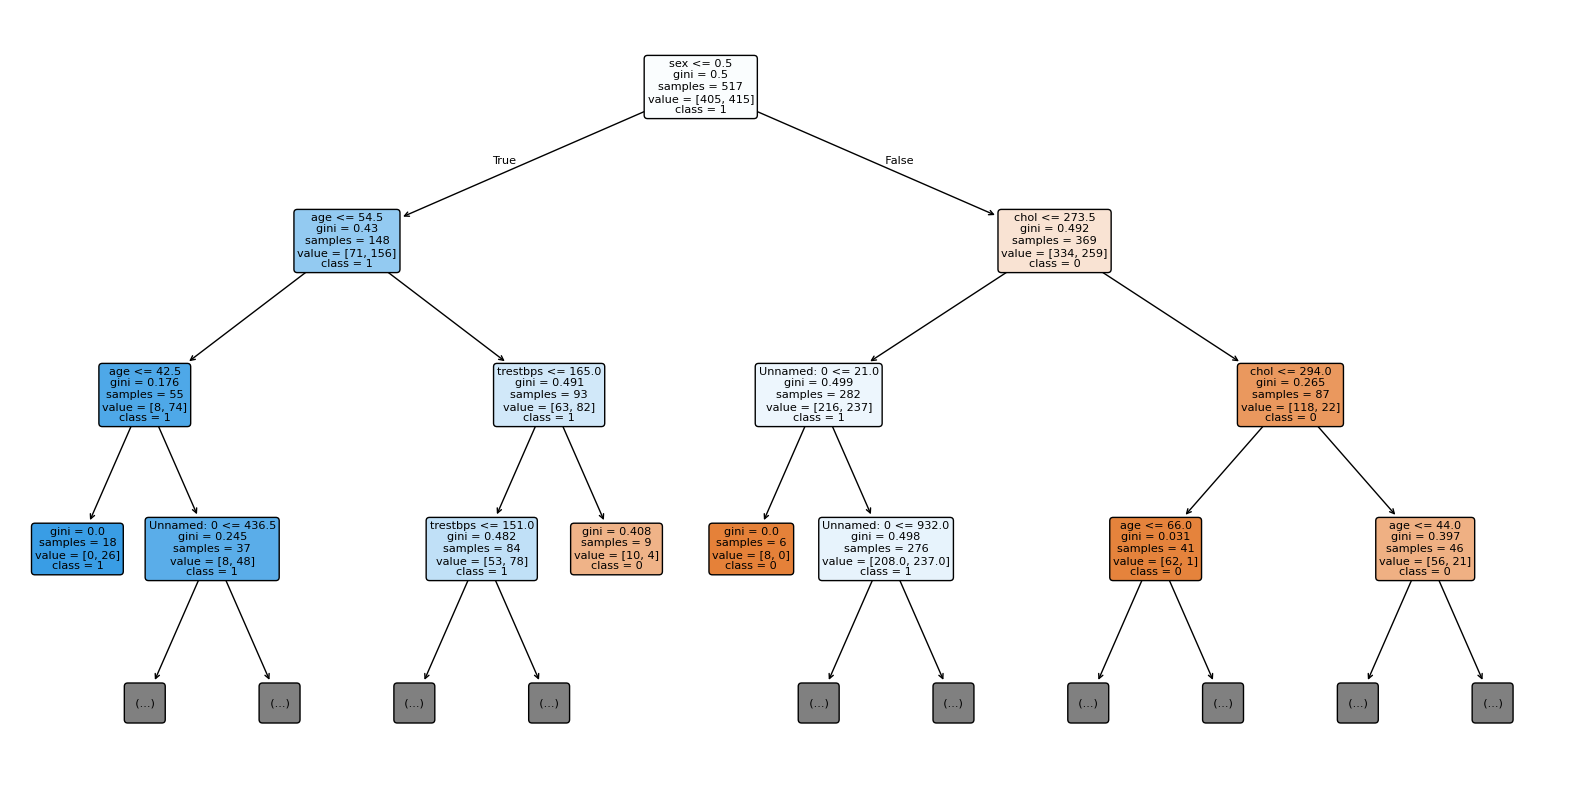

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

plot_tree(grid.best_estimator_[0],
          filled=True,
          feature_names=x.columns,
          class_names=[str(c) for c in grid.best_estimator_.classes_],
          max_depth=3,
          rounded=True)
plt.show()

<div style="background-color:green;color:white">

<br>

**Explica:**

* Qué variable aparece primero

El sexo aparece primero, lo que quiere decir que el modelo le asigna la principal prioridad a la hora de tomar decisiones.

* Qué significa una condición tipo *chol <= 240*

Que evaluará que el registro tenga un colesterol (`chol`) menor o igual a 240 para tomar una decisión.

* Por qué **no debemos mostrar este árbol a un médico como modelo final**

RandomForest crea varios árboles para tomar una decisión. Cada árbol evalúa unas variables y da su veredicto, pero es la combinación de todos los veredictos con lo que se clasifica al final. La representación de arriba es tan solo la de uno de los 100 árboles que ha creado el algoritmo y solo muestra una de las 100 pipelines de decisiones creadas. No representa la decisión final, tan sólo una prueba de ellas.

<br>

---

### 5.2 Importancia de variables

En este apartado se va a analizar **qué variables son más importantes para el modelo Random Forest** a la hora de realizar sus predicciones.

Un Random Forest toma decisiones combinando muchos árboles de decisión. En cada árbol, las variables no se usan todas por igual: algunas aparecen con más frecuencia y generan **mejores divisiones** que reducen más la incertidumbre del modelo.
A partir de esta información, el modelo puede estimar la **importancia relativa de cada variable**.

---


#### Pistas para la implementación

* Los modelos `RandomForestClassifier` calculan automáticamente la importancia de las variables tras el entrenamiento.
* Esta información se encuentra en un **atributo del modelo**.
* Para interpretarla correctamente:

  * es conveniente asociar cada valor con el nombre de su variable,
  * y ordenar los resultados para facilitar el análisis.

📌 **Ayuda**
Consulta la documentación de `RandomForestClassifier` para identificar el atributo que almacena la importancia de las variables y su significado.


In [ ]:
importances = grid.best_estimator_.feature_importances_
names = x_train.columns

df_imp = pd.DataFrame({"Variable": names, "Importancia": importances})
df_imp = df_imp.sort_values(by="Importancia", ascending=False)
df_imp

,Variable,Importancia
4,chol,0.284256
1,age,0.278764
3,trestbps,0.186884
0,Unnamed: 0,0.127677
2,sex,0.122419


<div style="background-color:green;color:white">

<br>

- ¿Coincide con lo que esperarías médicamente?

Sí. Una persona no experta podría esperar que el colesterol sea decisivo a la hora de predecir un infarto.

- ¿Qué variable eliminarías si quisieras simplificar aún más?

No parece que el sexo aporte tanto como el resto, por lo que podría a priori podría ser eliminada, pero tendría que hacerse pruebas para comprobar que los resultados siguen siendo buenos.

Además, se ha colado una variable `Unnamed: 0` que hace referencia al índice y que debe ser limpiada.

<br>

## Parte 6 – Comparación crítica de datasets

Entrena **el mismo modelo** con:

* dataset completo
* dataset de 4 variables


---

In [ ]:
x = df_ext.drop("target", axis=1)
y = df_ext["target"]
print(f"x: {x.shape}, y: {y.shape}")

x: (1025, 13), y: (1025,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="recall",
    n_jobs=1,
    verbose=3
)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END max_depth=2, min_samples_leaf=5, n_estimators=10;, score=0.917 total time=   0.1s
[CV 2/5] END max_depth=2, min_samples_leaf=5, n_estimators=10;, score=0.940 total time=   0.1s
[CV 3/5] END max_depth=2, min_samples_leaf=5, n_estimators=10;, score=0.929 total time=   0.1s
[CV 4/5] END max_depth=2, min_samples_leaf=5, n_estimators=10;, score=0.906 total time=   0.1s
[CV 5/5] END max_depth=2, min_samples_leaf=5, n_estimators=10;, score=0.847 total time=   0.1s
[CV 1/5] END max_depth=2, min_samples_leaf=5, n_estimators=30;, score=0.905 total time=   0.1s
[CV 2/5] END max_depth=2, min_samples_leaf=5, n_estimators=30;, score=0.893 total time=   0.1s
[CV 3/5] END max_depth=2, min_samples_leaf=5, n_estimators=30;, score=0.906 total time=   0.1s
[CV 4/5] END max_depth=2, min_samples_leaf=5, n_estimators=30;, score=0.894 total time=   0.1s
[CV 5/5] END max_depth=2, min_samples_leaf=5, n_estimators=30;, score=0.882 total 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100]},
             scoring='recall', verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}
0.952829131652661


In [ ]:
y_preds = grid.predict(x_test)
print(f"Reporte de clasificación: \n {classification_report(y_test, y_preds)}")

Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       102
           1       0.90      0.93      0.91       103

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



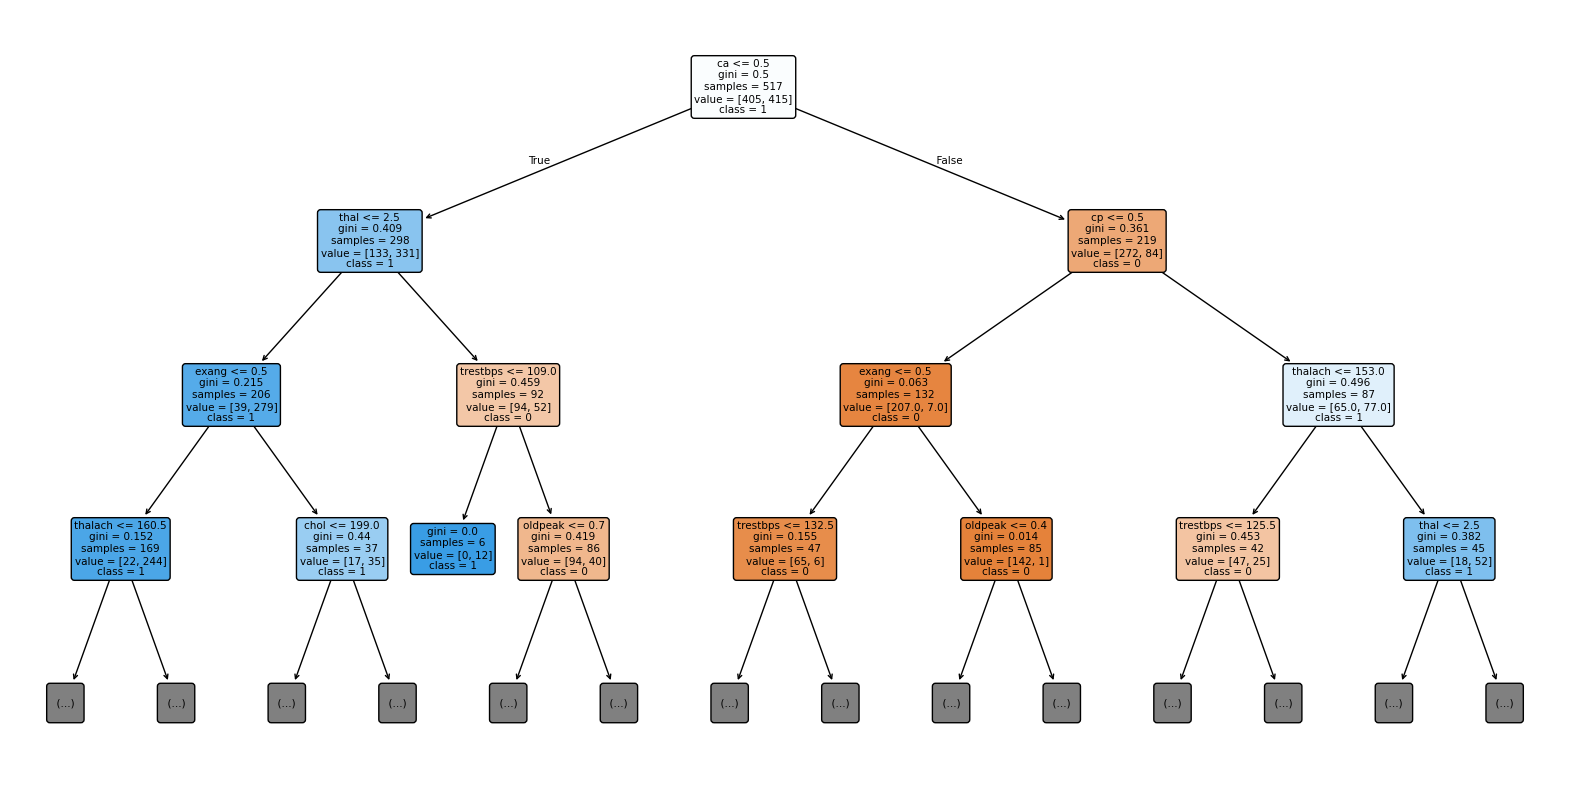

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

plot_tree(grid.best_estimator_[0],
          filled=True,
          feature_names=x.columns,
          class_names=[str(c) for c in grid.best_estimator_.classes_],
          max_depth=3,
          rounded=True)
plt.show()

In [ ]:
importances = grid.best_estimator_.feature_importances_
names = x_train.columns

df_imp = pd.DataFrame({"Variable": names, "Importancia": importances})
df_imp = df_imp.sort_values(by="Importancia", ascending=False)
df_imp

,Variable,Importancia
2,cp,0.154831
11,ca,0.139157
12,thal,0.132755
9,oldpeak,0.122500
7,thalach,0.118325
0,age,0.071589
8,exang,0.067608
4,chol,0.056181
3,trestbps,0.047170
10,slope,0.041534


<div style="background-color:green;color:white">

<br>

Completa una tabla como esta:

| Dataset | Accuracy | Interpretabilidad | Riesgo de overfitting |
| ------- | -------- | ----------------- | --- |
| 4 variables | 0.787 | Más sencilla | Menor |
| Completo | 0.952 | Más compleja | Mayor |

<br>



<div style="background-color:green;color:white">

<br>

¿Qué modelo recomendarías *en un hospital pequeño* y por qué?

Recomendaría el de 4 variables suponiendo que la capacidad de computación del hospital es baja. Aunque los resultados son mejorables, debemos suponer que existirán miles o millones de datos, por lo que procesarlo todo podría llegar a ser eterno.

<br>

---

## Parte 7 – Reflexión final

Responde brevemente (5–6 líneas cada una):

<div style="background-color:green;color:white">

<br>

1. ¿Por qué Random Forest es una buena elección aquí?

Es una buena opción porque al final Random Forest funciona como si muchos expertos diesen su opinión y se pusieran de acuerdo para dar una respuesta. Es un algoritmo capaz de tener en cuenta muchas variables de forma más óptima que otros, no necesita normalización y es robusto frente al ruido.

Generalmente los datos médicos suelen ser complejos y grandes, y por ello Random Forest es muy fuerte.

2. ¿Cuándo **no** usarías Random Forest?

Cuando es necesario explicar detalladamente el algoritmo y su toma de decisiones. Aunque es posible hacerlo, es muy costoso y complicado porque habría que ir árbol por árbol para ello. A esto le debemos sumar el uso de muchas variables por exactamente la misma razón; cuantas más variables, más decisiones y más árboles que explicar.

3. ¿Qué mejorarías si tuvieras más datos?

Como ya se ha mencionado, lo importante a mejorar en este caso es el `recall` porque estamos hablando de uso caso médico y, en el peor de los casos, un caso de vida o muerte. El objetivo de esto es evitar que se cuelen Falsos Negativos, es decir, pacientes que tienen riesgo cardíaco pero no hayan sido clasificados como tal y que, por lo tanto, no se les den recomendaciones para minimizar el riesgo o se les recete algo que lo pueda incrementar.

<br>
